In [1]:
import pandas as pd
import numpy as np
import datetime
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta

#Read data
data = pd.read_csv('data/analysis/D1_XAUXAGEUR_Returns.csv', parse_dates=[0], index_col='Date')
print(data.head())

              Open    High     Low   Close   Volume    Weekday  Yearday  \
Date                                                                      
2003-08-08  352.30  357.19  351.68  356.30  17176.0     Friday    220.0   
2003-08-10  355.80  355.80  355.21  355.27    352.0     Sunday    222.0   
2003-08-11  355.80  361.78  355.17  361.57  18463.0     Monday    223.0   
2003-08-12  361.60  361.71  357.36  358.48  20332.0    Tuesday    224.0   
2003-08-13  357.92  363.60  354.95  361.35  20764.0  Wednesday    225.0   

            Daily_return  Log_daily_Return  Open_XAG  ...  Volume_XAG  \
Date                                                  ...               
2003-08-08      1.184222          0.011773     4.966  ...      6015.0   
2003-08-10     -0.289082         -0.002895     4.925  ...        33.0   
2003-08-11      1.773299          0.017578     4.915  ...      2142.0   
2003-08-12     -0.854606         -0.008583     4.925  ...      2281.0   
2003-08-13      0.800603          0.

In [2]:
#Get correlation between instruments Gold vs EUR/XAG
corr_XAU_XAG = data['Close'].corr(data['Close_XAG'])
corr_ret_XAU_XAG = data['Daily_return'].corr(data['Daily_return_XAG'])
print('Correlation XAU - XAG closing prices: ', corr_XAU_XAG)
print('Correlation XAU - XAG daily returns: ', corr_ret_XAU_XAG)

corr_XAU_EUR = data['Close'].corr(data['Close_EUR'])
corr_ret_XAU_EUR = data['Daily_return'].corr(data['Daily_return_EUR'])
print('Correlation XAU - EUR closing prices: ', corr_XAU_EUR)
print('Correlation XAU - EUR daily returns: ', corr_ret_XAU_EUR)

Correlation XAU - XAG closing prices:  0.8808017606279614
Correlation XAU - XAG daily returns:  0.7680463150559792
Correlation XAU - EUR closing prices:  0.018244845978475904
Correlation XAU - EUR daily returns:  0.40066063713051353


In [3]:
corr_matrix = data.corr()

In [4]:
print(corr_matrix.head())

            Open      High       Low     Close    Volume   Yearday  \
Open    1.000000  0.999814  0.999734  0.999608  0.424161 -0.034939   
High    0.999814  1.000000  0.999622  0.999788  0.426118 -0.034507   
Low     0.999734  0.999622  1.000000  0.999816  0.421485 -0.035450   
Close   0.999608  0.999788  0.999816  1.000000  0.423259 -0.035327   
Volume  0.424161  0.426118  0.421485  0.423259  1.000000 -0.017101   

        Daily_return  Log_daily_Return  Open_XAG  High_XAG  ...  Volume_XAG  \
Open       -0.035784         -0.035177  0.880480  0.876412  ...    0.593620   
High       -0.023398         -0.022919  0.881192  0.877531  ...    0.598012   
Low        -0.020484         -0.019722  0.879196  0.875211  ...    0.587136   
Close      -0.009726         -0.009101  0.880286  0.876624  ...    0.592094   
Volume     -0.036698         -0.036855  0.198724  0.197503  ...    0.591818   

        Daily_return_XAG  Log_daily_Return_XAG  Open_EUR  High_EUR   Low_EUR  \
Open           -0.035937

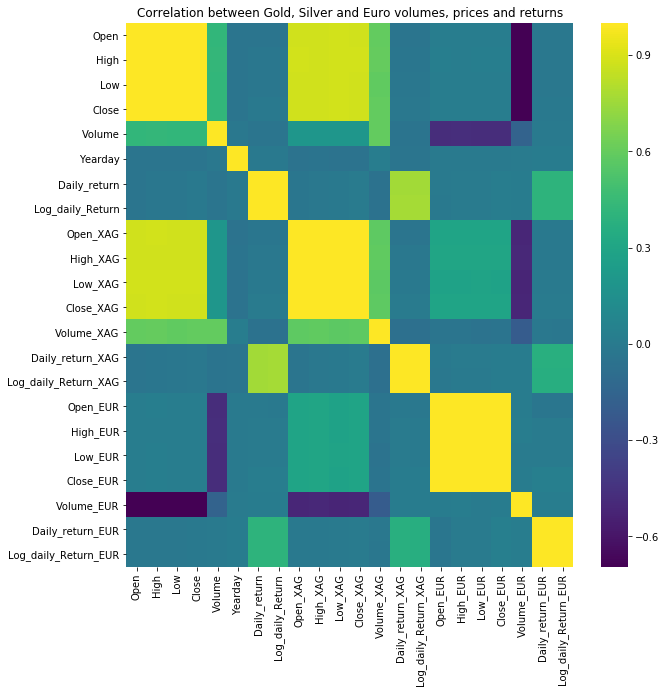

In [5]:
#Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='viridis', 
            xticklabels=corr_matrix.columns.values, 
            yticklabels=corr_matrix.columns.values)
plt.title('Correlation between Gold, Silver and Euro volumes, prices and returns')
plt.show()

In [6]:
#Date related features
data['Week'] = data.index.week
data['Day_Week'] = data.index.dayofweek
data['day_week_sin'] = np.sin(data.Day_Week*(2.*np.pi/7))
data['day_week_cos'] = np.cos(data.Day_Week*(2.*np.pi/7))
data['week_sin'] = np.sin((data.Week-1)*(2.*np.pi/52))
data['week_cos'] = np.cos((data.Week-1)*(2.*np.pi/52))
data['yearday_sin'] = np.sin((data.Yearday)*(2.*np.pi/365.25))
data['yearday_cos'] = np.cos((data.Yearday)*(2.*np.pi/365.25))

#XAU Technical Indicators
#Simple Moving Average - 50 day
data['SMA_50_XAU'] = ta.SMA(data.Close, timeperiod = 50)
#Simple Moving Average - 200 day
data['SMA_200_XAU'] = ta.SMA(data.Close, timeperiod = 200)
# Exponential Moving Average - 9 day
data['EMA_9_XAU'] = ta.EMA(data.Close, timeperiod = 9)
# Exponential Moving Average - 21 day
data['EMA_21_XAU'] = ta.EMA(data.Close, timeperiod = 21)
# MACD
data['macd_XAU'], data['macdsignal_XAU'], data['macdhist_XAU'] = ta.MACD(data.Close, fastperiod=12, slowperiod=200, signalperiod=9)
# RSI
data['RSI_XAU'] = ta.RSI(data.Close, timeperiod=14)
#Define relative indicators
data['SMA_Delta_XAU'] = (data['SMA_50_XAU'] - data['SMA_200_XAU']) / data['Close']
#Define relative indicators
data['EMA_Delta_XAU'] = (data['EMA_9_XAU'] - data['EMA_21_XAU']) / data['Close']

#XAG Technical Indicators
#Simple Moving Average - 50 day
data['SMA_50_XAG'] = ta.SMA(data.Close_XAG, timeperiod = 50)
#Simple Moving Average - 200 day
data['SMA_200_XAG'] = ta.SMA(data.Close_XAG, timeperiod = 200)
# Exponential Moving Average - 9 day
data['EMA_9_XAG'] = ta.EMA(data.Close_XAG, timeperiod = 9)
# Exponential Moving Average - 21 day
data['EMA_21_XAG'] = ta.EMA(data.Close_XAG, timeperiod = 21)
# MACD
data['macd_XAG'], data['macdsignal_XAG'], data['macdhist_XAG'] = ta.MACD(data.Close_XAG, fastperiod=12, slowperiod=200, signalperiod=9)
# RSI
data['RSI_XAG'] = ta.RSI(data.Close_XAG, timeperiod=14)
#Define relative indicators
data['SMA_Delta_XAG'] = (data['SMA_50_XAG'] - data['SMA_200_XAG']) / data['Close_XAG']
#Define relative indicators
data['EMA_Delta_XAG'] = (data['EMA_9_XAG'] - data['EMA_21_XAG']) / data['Close_XAG']


#EUR Technical Indicators
#Simple Moving Average - 50 day
data['SMA_50_EUR'] = ta.SMA(data.Close_EUR, timeperiod = 50)
#Simple Moving Average - 200 dayRela
data['SMA_200_EUR'] = ta.SMA(data.Close_EUR, timeperiod = 200)
# Exponential Moving Average - 9 day
data['EMA_9_EUR'] = ta.EMA(data.Close_EUR, timeperiod = 9)
# Exponential Moving Average - 21 day
data['EMA_21_EUR'] = ta.EMA(data.Close_EUR, timeperiod = 21)
# MACD
data['macd_EUR'], data['macdsignal_EUR'], data['macdhist_EUR'] = ta.MACD(data.Close_EUR, fastperiod=12, slowperiod=200, signalperiod=9)
# RSI
data['RSI_EUR'] = ta.RSI(data.Close_EUR, timeperiod=14)
#Define relative indicators
data['SMA_Delta_EUR'] = (data['SMA_50_EUR'] - data['SMA_200_EUR']) / data['Close_EUR']
#Define relative indicators
data['EMA_Delta_EUR'] = (data['EMA_9_EUR'] - data['EMA_21_EUR']) / data['Close_EUR']

#Additional indicators
data['XAU_XAG_Ratio'] = data['Close']/data['Close_XAG']

In [12]:
columns = list(data.columns.values)
print(columns)

['Open', 'High', 'Low', 'Close', 'Volume', 'Weekday', 'Yearday', 'Daily_return', 'Log_daily_Return', 'Open_XAG', 'High_XAG', 'Low_XAG', 'Close_XAG', 'Volume_XAG', 'Daily_return_XAG', 'Log_daily_Return_XAG', 'Open_EUR', 'High_EUR', 'Low_EUR', 'Close_EUR', 'Volume_EUR', 'Daily_return_EUR', 'Log_daily_Return_EUR', 'Week', 'Day_Week', 'day_week_sin', 'day_week_cos', 'week_sin', 'week_cos', 'yearday_sin', 'yearday_cos', 'SMA_50_XAU', 'SMA_200_XAU', 'EMA_9_XAU', 'EMA_21_XAU', 'macd_XAU', 'macdsignal_XAU', 'macdhist_XAU', 'RSI_XAU', 'SMA_Delta_XAU', 'EMA_Delta_XAU', 'SMA_50_XAG', 'SMA_200_XAG', 'EMA_9_XAG', 'EMA_21_XAG', 'macd_XAG', 'macdsignal_XAG', 'macdhist_XAG', 'RSI_XAG', 'SMA_Delta_XAG', 'EMA_Delta_XAG', 'SMA_50_EUR', 'SMA_200_EUR', 'EMA_9_EUR', 'EMA_21_EUR', 'macd_EUR', 'macdsignal_EUR', 'macdhist_EUR', 'RSI_EUR', 'SMA_Delta_EUR', 'EMA_Delta_EUR', 'XAU_XAG_Ratio']


In [16]:
#Get only technical indicators for last matrix
TA_list = ['SMA_50_XAU', 'SMA_200_XAU', 'EMA_9_XAU', 'EMA_21_XAU', 'macd_XAU', 'macdsignal_XAU', 'macdhist_XAU', 'RSI_XAU', 'SMA_Delta_XAU', 'EMA_Delta_XAU', 'SMA_50_XAG', 'SMA_200_XAG', 'EMA_9_XAG', 'EMA_21_XAG', 'macd_XAG', 'macdsignal_XAG', 'macdhist_XAG', 'RSI_XAG', 'SMA_Delta_XAG', 'EMA_Delta_XAG', 'SMA_50_EUR', 'SMA_200_EUR', 'EMA_9_EUR', 'EMA_21_EUR', 'macd_EUR', 'macdsignal_EUR', 'macdhist_EUR', 'RSI_EUR', 'SMA_Delta_EUR', 'EMA_Delta_EUR', 'XAU_XAG_Ratio']
ta_matrix = data[TA_list]
ta_matrix.head()

SMA_50_XAU  SMA_200_XAU  EMA_9_XAU  EMA_21_XAU  macd_XAU  \
Date                                                                   
2003-08-08         NaN          NaN        NaN         NaN       NaN   
2003-08-10         NaN          NaN        NaN         NaN       NaN   
2003-08-11         NaN          NaN        NaN         NaN       NaN   
2003-08-12         NaN          NaN        NaN         NaN       NaN   
2003-08-13         NaN          NaN        NaN         NaN       NaN   

            macdsignal_XAU  macdhist_XAU  RSI_XAU  SMA_Delta_XAU  \
Date                                                               
2003-08-08             NaN           NaN      NaN            NaN   
2003-08-10             NaN           NaN      NaN            NaN   
2003-08-11             NaN           NaN      NaN            NaN   
2003-08-12             NaN           NaN      NaN            NaN   
2003-08-13             NaN           NaN      NaN            NaN   

            EMA_Delta_XAU  ...  SMA_200_EUR  EMA_9_EUR  EMA_21_EUR  macd_EUR  \
Date                       ...                                                 
2003-08-08            NaN  ...          NaN        NaN         NaN       NaN   
2003-08-10            NaN  ...          NaN        NaN         NaN       NaN   
2003-08-11            NaN  ...          NaN        NaN         NaN       NaN   
2003-08-12            NaN  ...          NaN        NaN         NaN       NaN   
2003-08-13            NaN  ...          NaN        NaN         NaN       NaN   

            macdsignal_EUR  macdhist_EUR  RSI_EUR  SMA_Delta_EUR  \
Date                                                               
2003-08-08             NaN           NaN      NaN            NaN   
2003-08-10             NaN           NaN      NaN            NaN   
2003-08-11             NaN           NaN      NaN            NaN   
2003-08-12             NaN           NaN      NaN            NaN   
2003-08-13             NaN           NaN      NaN            NaN   

            EMA_Delta_EUR  XAU_XAG_Ratio  
Date                                      
2003-08-08            NaN      72.952498  
2003-08-10            NaN      73.176107  
2003-08-11            NaN      73.609528  
2003-08-12            NaN      75.231899  
2003-08-13            NaN      73.759951  

[5 rows x 31 columns]

In [17]:
corr_matrix_ta = ta_matrix.corr()

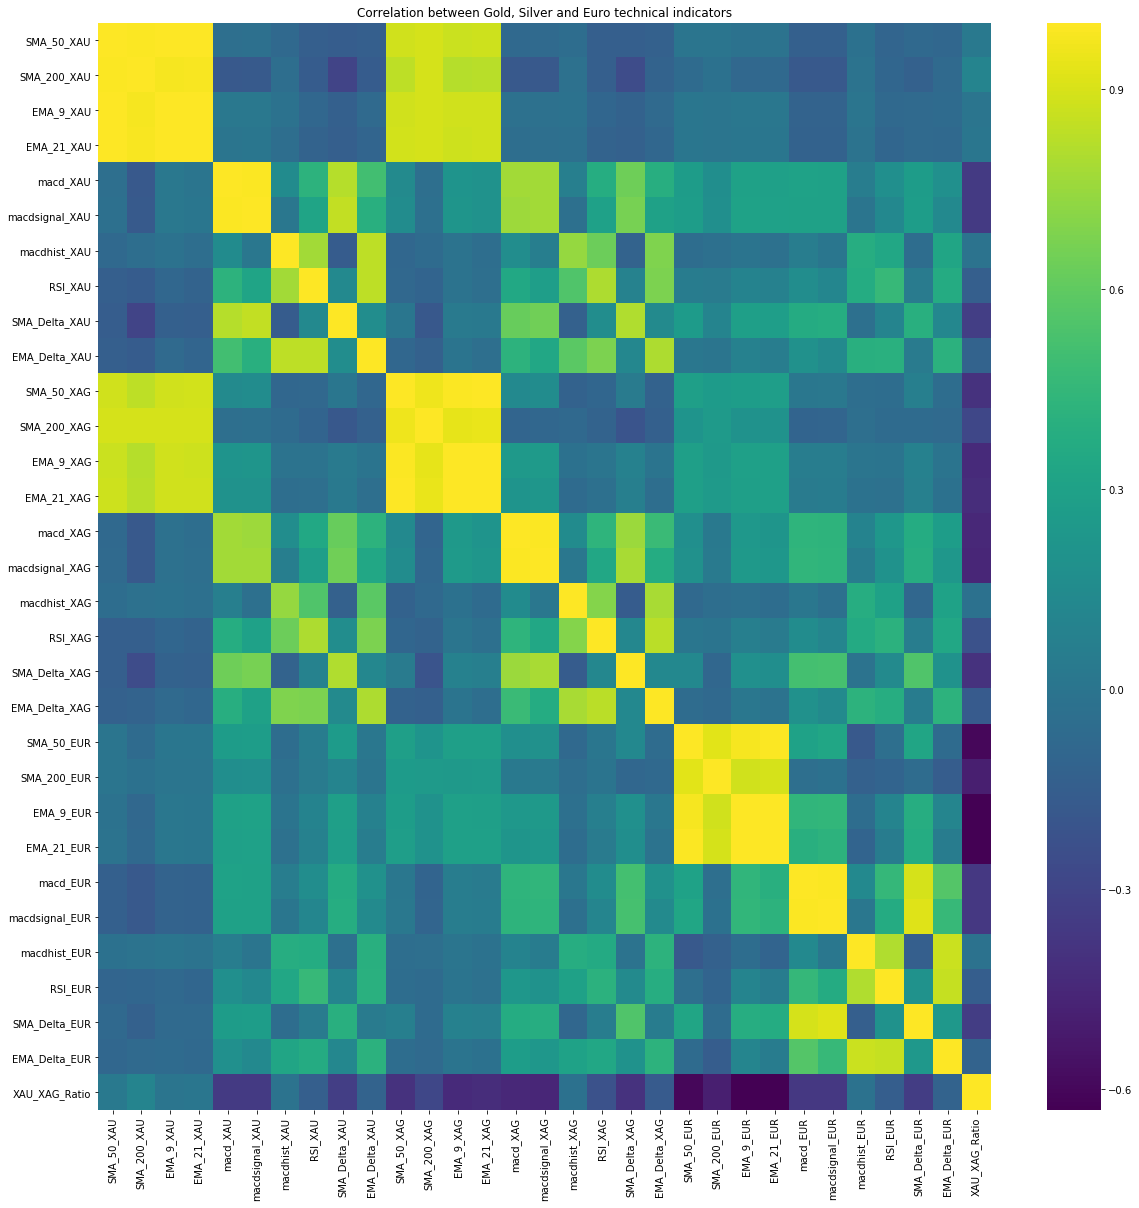

In [18]:
#Plot correlation matrix with technical indicators
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_ta, cmap='viridis', 
            xticklabels=corr_matrix_ta.columns.values, 
            yticklabels=corr_matrix_ta.columns.values)
plt.title('Correlation between Gold, Silver and Euro technical indicators')
plt.show()